# *Project -* **Topic Classification**
*Subject -* Natural Language Processing 

*Member :*

Phat Le Vo Tien     - 19521993

Trung Nguyen Thanh  - 19522432

## Connect Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lib

In [ ]:
import pandas as pd
import numpy as np
#%matplotlib ipympl

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [ ]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Count words

In [ ]:
import string
import re
import joblib


In [ ]:
str_ = "Jiri missed a routine backhand in the ninth game and faced a break point. He saved it with a service winner and missed a game point that would cost him dearly. The Czech netted a forehand to face the second break point, and the American converted it after a beautiful rally that pushed him 5-4 in front. Fritz served for the victory in game ten and sealed the deal with an ace to earn the first victory of the new season."

In [ ]:
def process_text(text):
    text = text.lower()
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", " ", text
    )
    text = " ".join(text.split())
    return text

In [ ]:
str1 = process_text(str_)
#str1

In [ ]:
str1 = str1.split()
#str1

In [ ]:
c=0
for i in str1:
  c+=1;
c

82

## Import data

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_train = df_train[["Doc", "byHand", "Categories"]]
df_train = df_train.dropna()
#df_train

df_test = pd.read_csv("/content/test.csv")
df_test = df_test[["Doc", "byHand", "Categories"]]
df_test = df_test.dropna()


In [ ]:
#X_train

## Visualize Data

In [ ]:
"""
targets_test, frequency_test = np.unique(df_train.Categories, return_counts=True)
targets_test_str = ['Basketball', 'Football', 'Golf', 'Tennis']
print(list(zip(targets_test_str, frequency_test)))
"""

targets_test, frequency_test = np.unique(df_test.Categories, return_counts=True)
targets_test_str = ['Basketball', 'Football', 'Golf', 'Tennis']
print(list(zip(targets_test_str, frequency_test)))

#"""


[('Basketball', 3), ('Football', 3), ('Golf', 3), ('Tennis', 3)]


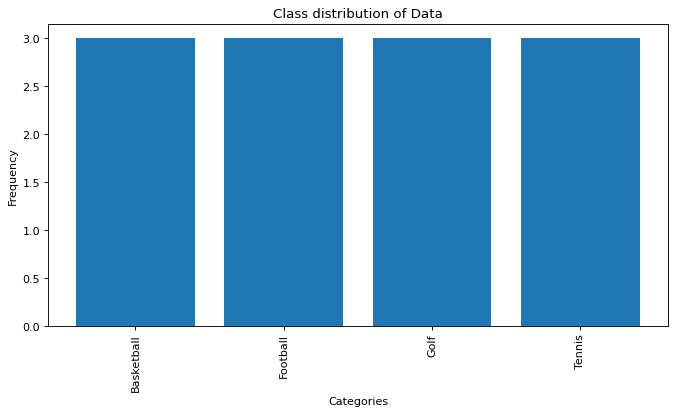

In [ ]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of Data')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_test

,Doc,byHand,Categories
0,Do you remember when you were a kid and you sa...,Do you remember when you be a kid and you see ...,Football
1,Footage from Barcelona's new Amazon Prime seri...,Footage from Barcelona's new Amazon Prime seri...,Football
2,"The 34-year-old, who came through the academy ...","The 34-year-old, who come through the academy ...",Football
3,Andy Murray and his brother Jamie beat Neal Sk...,Andy Murray and he brother Jamie beat Neal Sku...,Tennis
4,The 6ft 1in right-handed Austrian has always h...,The 6ft 1in right-handed Austrian have always ...,Tennis
5,Kyrgios sparked more controversy after pulling...,Kyrgios spark more controversy after pull out ...,Tennis
6,"First, players had to wait for the green to cl...","First, player have to wait for the green to cl...",Golf
7,Adam Scott has confirmed he will join compatri...,Adam Scott have confirm he will join compatrio...,Golf
8,We played St. Andrews’ Duke’s Course that morn...,We play St. Andrews’ Duke’s Course that mornin...,Golf
9,"When it comes to men's 3x3, there has only bee...","When it come to men's 3x3, there have only be ...",Basketball


## SVM Train, Test

In [ ]:
X_train = df_train["Doc"]
X_test = df_test["Doc"]
y_train = df_train["Categories"]
y_test = df_test["Categories"]

### stop_words = 'english'

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

  Basketball       1.00      0.67      0.80         3
    Football       0.40      0.67      0.50         3
        Golf       1.00      0.67      0.80         3
      Tennis       0.67      0.67      0.67         3

    accuracy                           0.67        12
   macro avg       0.77      0.67      0.69        12
weighted avg       0.77      0.67      0.69        12



In [ ]:
print('Predicted: ', predicted)
print('Actual: ', y_test)

Predicted:  ['Football' 'Football' 'Tennis' 'Tennis' 'Tennis' 'Football' 'Golf' 'Golf'
 'Football' 'Football' 'Basketball' 'Basketball']
Actual:  0       Football
1       Football
2       Football
3         Tennis
4         Tennis
5         Tennis
6           Golf
7           Golf
8           Golf
9     Basketball
10    Basketball
11    Basketball
Name: Categories, dtype: object


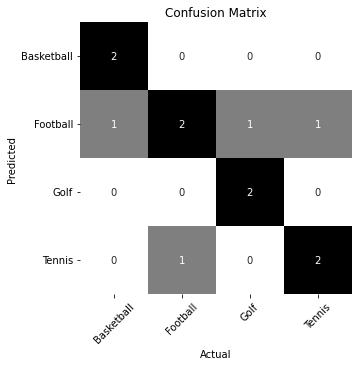

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

### Non stop_words

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         3
    Football       0.60      1.00      0.75         3
        Golf       1.00      0.67      0.80         3
      Tennis       1.00      0.67      0.80         3

    accuracy                           0.83        12
   macro avg       0.90      0.83      0.84        12
weighted avg       0.90      0.83      0.84        12



In [ ]:
print('Predicted: ', predicted)
print('Actual: ', y_test)

Predicted:  ['Football' 'Football' 'Football' 'Tennis' 'Tennis' 'Football' 'Golf'
 'Golf' 'Football' 'Basketball' 'Basketball' 'Basketball']
Actual:  0       Football
1       Football
2       Football
3         Tennis
4         Tennis
5         Tennis
6           Golf
7           Golf
8           Golf
9     Basketball
10    Basketball
11    Basketball
Name: Categories, dtype: object


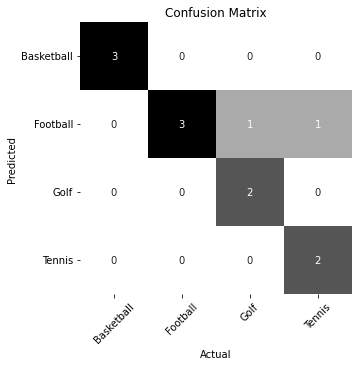

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

## Classification with NLP (Porter_Stem, Lemma)

### Cre Stemming & Lemmatizer

In [ ]:
# Chuyen tu goc Lemmatizer
# import these modules


In [ ]:
#tokenizer= word_tokenize() #if you want to split text into word tokens
lemmatizer = WordNetLemmatizer()

In [ ]:
def tokenizer(text):
  tokens = word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  return tokens

In [ ]:
tokens = df_train['Doc'].apply(tokenizer)

In [ ]:
showz = 'Natural language processing strives to build machines that understand'

In [ ]:
print('Before: ', showz)
print('After:  ', ', '.join(showz.split()))

Before:  Natural language processing strives to build machines that understand
After:   Natural, language, processing, strives, to, build, machines, that, understand


In [ ]:
token = word_tokenize(showz)

In [ ]:
spl = showz.split()

In [ ]:
lemmaz = ' '.join([lemmatizer.lemmatize(word, pos='n') for word in showz.split()])
lemmaz = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in lemmaz.split()])
lemmaz = ' '.join([lemmatizer.lemmatize(word, pos='a') for word in lemmaz.split()])
lemmaz = ' '.join([lemmatizer.lemmatize(word, pos='r') for word in lemmaz.split()])

In [ ]:
print(lemmaz)

Natural language process strive to build machine that understand


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print('machines --> ', lemmatizer.lemmatize('machines', pos='n'))
print('strives --> ', lemmatizer.lemmatize('strives', pos='v'))
print('better --> ', lemmatizer.lemmatize('better', pos='a'))

machines -->  machine
strives -->  strive
better -->  good


In [ ]:
#tokens

In [ ]:
def porter_stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text= ' '.join([ps.stem(word) for word in text.split()])
  return text

  

In [ ]:
import nltk
nltk.download('stopwords')

stopword_list= stopwords.words('english')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

def token_stop_word(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [ ]:
def lemmatization(text):
  """
  tokens = word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  lemmatized_string = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
  """
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='n') for word in text.split()])
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in lemmatized_string.split()])
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='a') for word in lemmatized_string.split()])
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='r') for word in lemmatized_string.split()])
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='s') for word in lemmatized_string.split()])
  #lemmatized_string = token_stop_word(lemmatized_string) # no use stopwords
  return lemmatized_string

In [ ]:
# Apply 
df_train['Lemma'] = df_train['Doc'].apply(lemmatization)
df_test['Lemma'] = df_test['Doc'].apply(lemmatization)

In [ ]:
#df_test

### Non-stopwords

#### by Hand

In [ ]:
X_train_h = df_train['byHand']
y_train_h = df_train['Categories']
X_test_h = df_test['byHand']
y_test_h = df_test['Categories']

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train_h, y_train_h)
predicted_h = text_clf.predict(X_test_h)
print(metrics.classification_report(y_test_h, predicted_h))

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         3
    Football       0.60      1.00      0.75         3
        Golf       1.00      0.33      0.50         3
      Tennis       0.67      0.67      0.67         3

    accuracy                           0.75        12
   macro avg       0.82      0.75      0.73        12
weighted avg       0.82      0.75      0.73        12



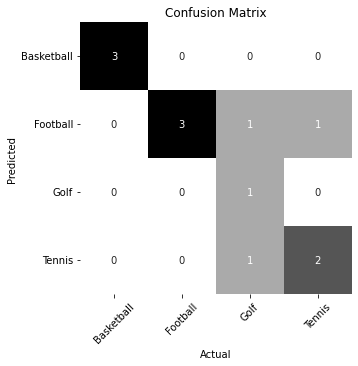

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test_h, predicted_h)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

In [ ]:
print('Predicted: ', predicted_h)
print('Actual: ', '\n', y_test_h)

Predicted:  ['Football' 'Football' 'Football' 'Tennis' 'Tennis' 'Football' 'Tennis'
 'Golf' 'Football' 'Basketball' 'Basketball' 'Basketball']
Actual:  
 0       Football
1       Football
2       Football
3         Tennis
4         Tennis
5         Tennis
6           Golf
7           Golf
8           Golf
9     Basketball
10    Basketball
11    Basketball
Name: Categories, dtype: object


#### Lemma

In [ ]:
X_train_l = df_train['Lemma']
y_train_l = df_train['Categories']
X_test_l = df_test['Lemma']
y_test_l = df_test['Categories']

In [ ]:
#predicted

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train_l, y_train_l)
predicted_l = text_clf.predict(X_test_l)
print(metrics.classification_report(y_test_l, predicted_l))

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         3
    Football       0.60      1.00      0.75         3
        Golf       1.00      0.33      0.50         3
      Tennis       0.67      0.67      0.67         3

    accuracy                           0.75        12
   macro avg       0.82      0.75      0.73        12
weighted avg       0.82      0.75      0.73        12



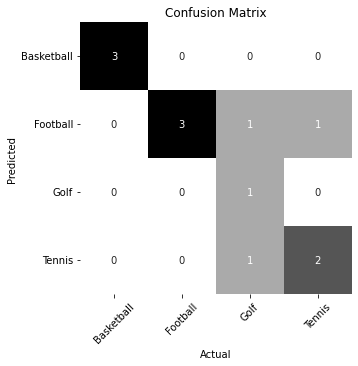

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test_l, predicted_l)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

In [ ]:
print('Predicted: ', predicted_l)
print('Actual: ', '\n', y_test_l)

Predicted:  ['Football' 'Football' 'Football' 'Tennis' 'Tennis' 'Football' 'Tennis'
 'Golf' 'Football' 'Basketball' 'Basketball' 'Basketball']
Actual:  
 0       Football
1       Football
2       Football
3         Tennis
4         Tennis
5         Tennis
6           Golf
7           Golf
8           Golf
9     Basketball
10    Basketball
11    Basketball
Name: Categories, dtype: object


### stopwords

In [ ]:

stopword_list= stopwords.words('english')
stop_words = set(stopwords.words('english'))

In [ ]:
def lemmatization(text):
  """
  tokens = word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  lemmatized_string = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
  """
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='n') for word in text.split()])
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in lemmatized_string.split()])
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='a') for word in lemmatized_string.split()])
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='r') for word in lemmatized_string.split()])
  lemmatized_string = ' '.join([lemmatizer.lemmatize(word, pos='s') for word in lemmatized_string.split()])
  lemmatized_string = token_stop_word(lemmatized_string)
  return lemmatized_string

#### By Hand

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train_h, y_train_h)
predicted_h = text_clf.predict(X_test_h)
print(metrics.classification_report(y_test_h, predicted_h))

              precision    recall  f1-score   support

  Basketball       1.00      0.67      0.80         3
    Football       0.40      0.67      0.50         3
        Golf       1.00      0.67      0.80         3
      Tennis       0.67      0.67      0.67         3

    accuracy                           0.67        12
   macro avg       0.77      0.67      0.69        12
weighted avg       0.77      0.67      0.69        12



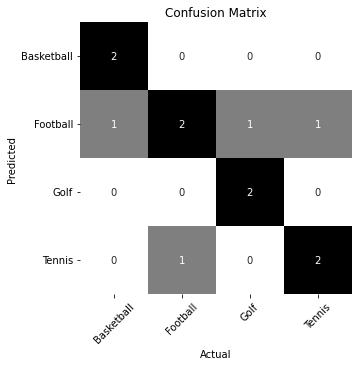

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test_l, predicted_h)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

In [ ]:
print('Predicted: ', predicted_h)
print('Actual: ', '\n', y_test_h)

Predicted:  ['Football' 'Football' 'Tennis' 'Tennis' 'Tennis' 'Football' 'Golf' 'Golf'
 'Football' 'Football' 'Basketball' 'Basketball']
Actual:  
 0       Football
1       Football
2       Football
3         Tennis
4         Tennis
5         Tennis
6           Golf
7           Golf
8           Golf
9     Basketball
10    Basketball
11    Basketball
Name: Categories, dtype: object


#### Lemma

In [ ]:
df_train['Lemma'] = df_train['Doc'].apply(lemmatization)
df_test['Lemma'] = df_test['Doc'].apply(lemmatization)

In [ ]:
X_train_l = df_train['Lemma']
y_train_l = df_train['Categories']
X_test_l = df_test['Lemma']
y_test_l = df_test['Categories']

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),  
                     ])
text_clf.fit(X_train_l, y_train_l)
predicted_l = text_clf.predict(X_test_l)
print(metrics.classification_report(y_test_l, predicted_l))

              precision    recall  f1-score   support

  Basketball       1.00      0.67      0.80         3
    Football       0.50      1.00      0.67         3
        Golf       1.00      0.67      0.80         3
      Tennis       1.00      0.67      0.80         3

    accuracy                           0.75        12
   macro avg       0.88      0.75      0.77        12
weighted avg       0.88      0.75      0.77        12



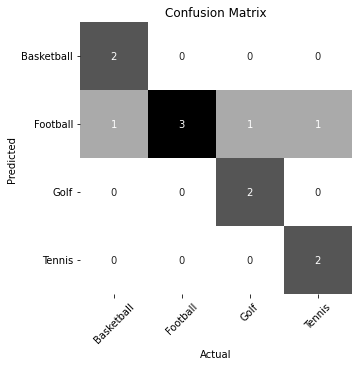

In [ ]:
names = ['Basketball', 'Football', 'Golf', 'Tennis']
cnf_mat = confusion_matrix(y_test_l, predicted_l)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

In [ ]:
print('Predicted: ', predicted_l)
print('Actual: ', '\n', y_test_l)

Predicted:  ['Football' 'Football' 'Football' 'Tennis' 'Tennis' 'Football' 'Golf'
 'Golf' 'Football' 'Football' 'Basketball' 'Basketball']
Actual:  
 0       Football
1       Football
2       Football
3         Tennis
4         Tennis
5         Tennis
6           Golf
7           Golf
8           Golf
9     Basketball
10    Basketball
11    Basketball
Name: Categories, dtype: object
